Summary of Null: 
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    

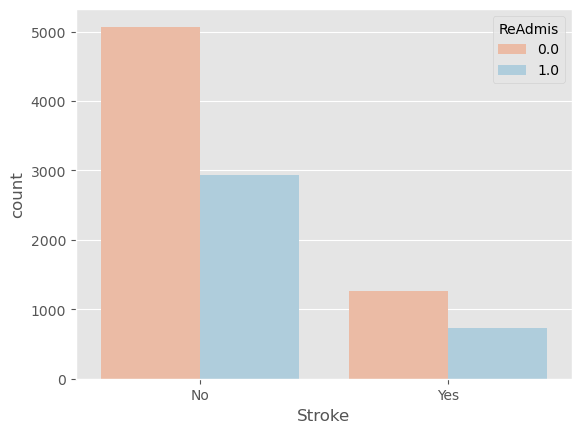

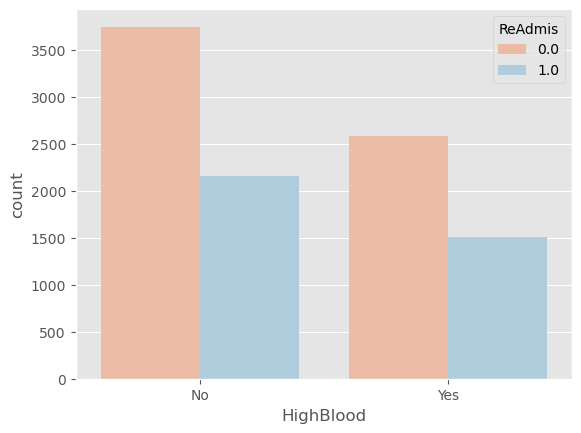

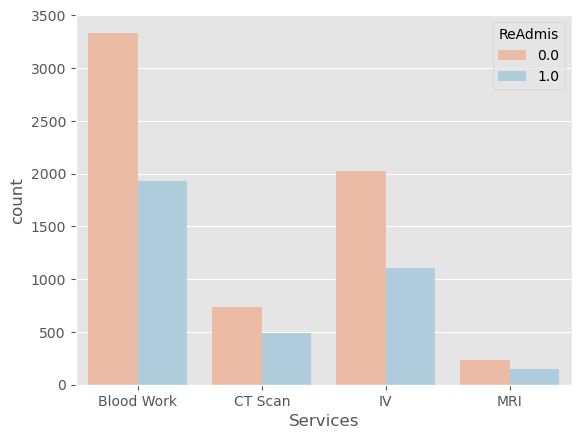

Prepared Data has been exported to CSV
 Data has been prepared     
KNN:
(10000, 38)
(10000,)
Train and Test Data has been exported to CSV


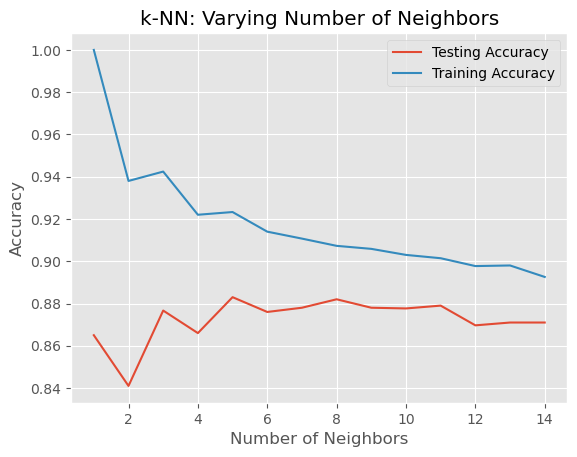

Test set predictions:\n [1. 1. 0. ... 1. 1. 1.]
Score:  0.882


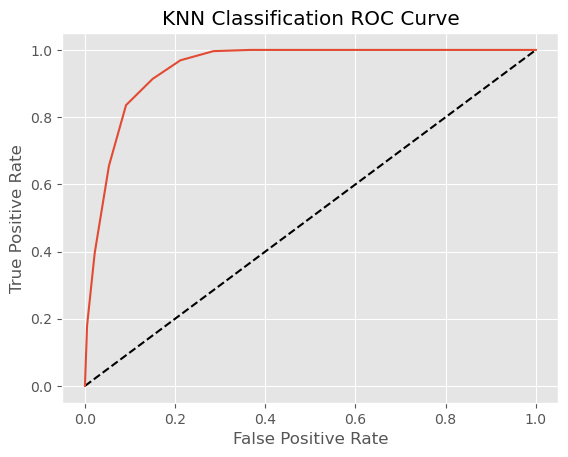

AUC:  0.9465996013964039


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Data Preparation

#Reads CSV to data frame, sets case order to index
med_dirty= pd.read_csv('/Users/herlihpj/Desktop/Data Analytics/D209 - Data Mining/Task 1/medical_clean.csv', 
                         index_col=0)
#Check for Null
print('Summary of Null: ')
print(med_dirty.isna().sum())

#Check for duplicated data
duplicates=med_dirty.duplicated()
print('Duplicates: ;', duplicates.sum())

#Add column titles to last 8 columns of the data frame
#Relabel mislabeled columns
med_dirty.rename(columns = {'Item1':'Timely admission',
    'Item2':'Timely treatment',
    'Item3':'Timely visits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'Hours of treatment',
    'Item7':'Courteous staff',
    'Item8':'Evidence of active listening'},
inplace=True)

# Dropping columns not relavant to the analysis
med_mine = med_dirty.drop(columns= ["Customer_id", "Interaction",'TimeZone', "UID", "City", "County", "Zip", "Lat",
                            "Lng",'Job']) 

#Explore the data/statistics
print(med_mine.head())
print(med_mine.describe())
print(med_mine.info())

#Ordinal Encoding to convert to numeric 0:No, 1:Yes; other variable alphabetically starting with 0
oe_dict={}
#list of columns to convert to numerical
convert_cols=['State','Area','Services', 'Marital', 'Gender','ReAdmis','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 
              'Complication_risk','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia','BackPain', 'Anxiety',
             'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services']
for col_name in convert_cols:
    #print(col_name+' pre: '+str(med_mine[col_name].unique()))
    #Creates column ordinal encoder
    oe_dict[col_name]=OrdinalEncoder()
    col=med_mine[col_name]
    #select non-null values of col
    col_not_null=col[col.notnull()]
    reshaped_vals=col_not_null.values.reshape(-1,1)
    encoded_vals=oe_dict[col_name].fit_transform(reshaped_vals)
    med_mine.loc[col.notnull(), col_name]=np.squeeze(encoded_vals)
    #print(col_name+' post: '+str(med_mine[col_name].unique()))
    
#Visual EDA - wouldnt plot with color y?
#_= pd.plotting.scatter_matrix(med_mine, c = 'green', figsize = [8, 8],s=150, marker = 'D')
#returns a series of plots and histograms
#Slow runtime too many graphs with this data

#Various Countplots to Visualize data
plt.figure()
#RdBu is for red blue
sns.countplot(x='Stroke', hue='ReAdmis', data=med_mine, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
    
sns.countplot(x='HighBlood', hue='ReAdmis', data=med_mine, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

sns.countplot(x='Services', hue='ReAdmis', data=med_mine, palette='RdBu')
plt.xticks([0,1,2,3], ['Blood Work', 'CT Scan', 'IV', 'MRI'])
plt.show()

med_mine.to_csv('/Users/herlihpj/Desktop/Data Analytics/D209 - Data Mining/Task 1/Prepared_data.csv')    
print('Prepared Data has been exported to CSV')
    
print('======================= \n Data has been prepared     \n======================= ')

    
### KNN CLASSIFICATION ###
print('KNN:')
target='ReAdmis'

#Train/test Split
X=med_mine.drop(target, axis=1).values #can drop readmis too doesnt change anything
y=med_mine[target]
#Check to make sure target has same numer of rows and just one value
print(X.shape)
print(y.shape) 

#Train/test Split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)

#Export split data
# Convert X_train and y_train into DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
# Merge X_train_df and y_train_df into a single DataFrame
train = X_train_df.join(y_train_df)
test = X_test_df.join(y_test_df)
#Export to CSV's
train.to_csv('/Users/herlihpj/Desktop/Data Analytics/D209 - Data Mining/Task 1/Training_data.csv')    
test.to_csv('/Users/herlihpj/Desktop/Data Analytics/D209 - Data Mining/Task 1/Testing_data.csv')    

print('Train and Test Data has been exported to CSV')

### Model Comlexity Curves ###
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
#Over fit at 4 and under Fit at 11 so hashed out.use 5-8 neighbors which was added above

###Build the final model ###
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#print('Prediction: {}’.format(prediction)) #how to print predictions
print("Test set predictions:\\n {}".format(y_pred))
print('Score: ',knn.score(X_test, y_test))

### Check the model using AUC ###

#PLotting the ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr, label='KNN Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classification ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score
print('AUC: ',roc_auc_score(y_test, y_pred_prob))
